<a href="https://colab.research.google.com/github/Praddysingh568/Sales-Mart-analysis-Report/blob/main/Smart_mart_Analysis_and_sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
# Generate 1000 random dates and times within a specific range
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
date_times = [start_date + timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(1000)]
# Generate random customer IDs
customer_ids = ['C' + str(i).zfill(4) for i in range(1, 1001)]
# Generate random product IDs
product_ids = ['P' + str(i).zfill(3) for i in range(1, 101)]
# Generate random quantities sold
quantities_sold = np.random.randint(1, 10, size=1000)
# Generate random unit prices
unit_prices = np.random.uniform(1, 100, size=1000)
# Calculate total transaction amounts
total_transaction_amounts = quantities_sold * unit_prices
# Generate random store IDs
store_ids = ['S' + str(i).zfill(3) for i in range(1, 11)]
# Randomly assign store IDs to transactions
store_ids = [random.choice(store_ids) for _ in range(1000)]
# Create DataFrame
data = {
 'Date & Time': date_times,
 'Customer ID': random.choices(customer_ids, k=1000),
 'Product ID': random.choices(product_ids, k=1000),
 'Quantity Sold': quantities_sold,
 'Unit Price': unit_prices,
 'Total Transaction Amount': total_transaction_amounts,
 'Store ID': store_ids
}
df = pd.DataFrame(data)
# Convert Date & Time column to datetime format
df['Date & Time'] = pd.to_datetime(df['Date & Time'])
# Sort DataFrame by Date & Time
df = df.sort_values(by='Date & Time')
# Reset index
df.reset_index(drop=True, inplace=True)
# Print DataFrame
print(df)


            Date & Time Customer ID Product ID  Quantity Sold  Unit Price  \
0   2024-01-01 00:03:01       C0217       P067              3    3.994757   
1   2024-01-01 02:07:04       C0070       P046              7   90.992271   
2   2024-01-01 04:37:09       C0733       P051              2   65.702393   
3   2024-01-02 07:59:19       C0671       P047              1   76.384911   
4   2024-01-02 10:39:45       C0596       P099              6   88.661660   
..                  ...         ...        ...            ...         ...   
995 2024-12-30 12:55:45       C0821       P040              4   54.402233   
996 2024-12-30 13:19:39       C0506       P068              7   34.275063   
997 2024-12-30 14:22:36       C0600       P042              7    7.554812   
998 2024-12-30 16:02:40       C0689       P003              1   75.635464   
999 2024-12-30 20:17:39       C0034       P076              5   36.956448   

     Total Transaction Amount Store ID  
0                   11.984270     

In [3]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)


                         Date & Time  Quantity Sold   Unit Price  \
count                           1000    1000.000000  1000.000000   
mean   2024-07-03 07:40:11.018000128       4.950000    50.496553   
min              2024-01-01 14:10:47       1.000000     1.328178   
25%              2024-03-31 18:39:14       3.000000    25.763540   
50%       2024-07-09 13:22:42.500000       5.000000    50.740956   
75%              2024-09-28 09:49:58       7.000000    74.817556   
max              2024-12-30 22:29:33       9.000000    99.990287   
std                              NaN       2.634092    28.316794   

       Total Transaction Amount  
count               1000.000000  
mean                 251.283958  
min                    1.958127  
25%                   78.316602  
50%                  186.400432  
75%                  373.834083  
max                  897.960173  
std                  211.989422  


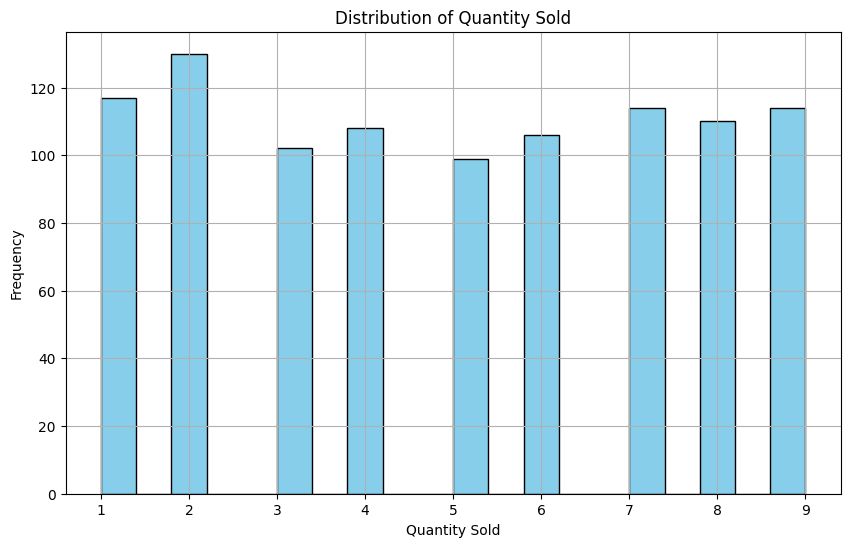

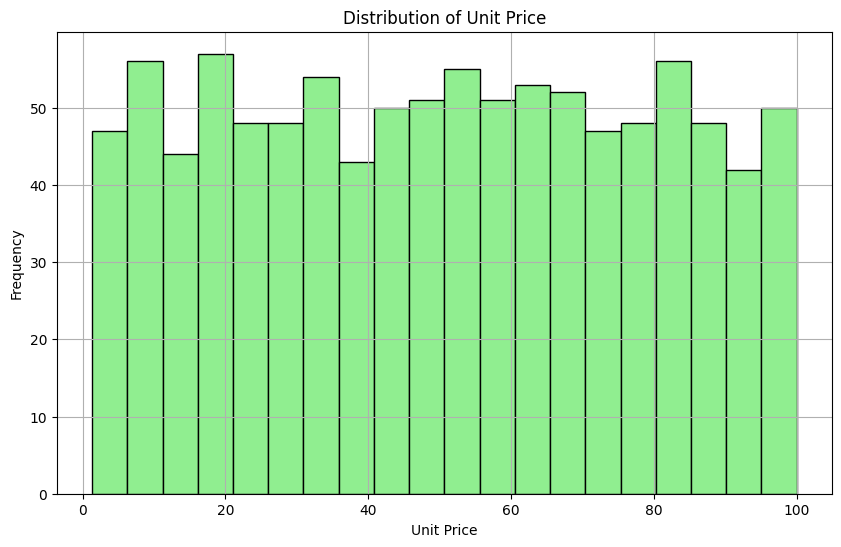

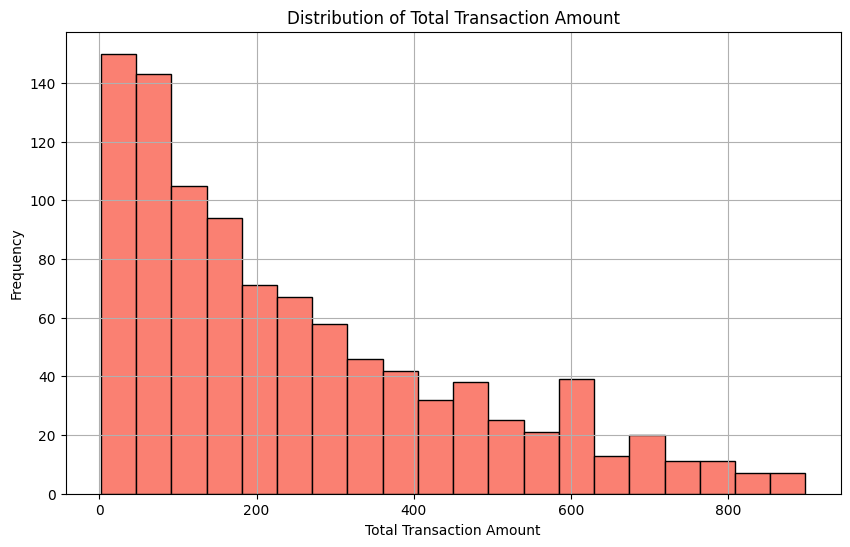

In [4]:
import matplotlib.pyplot as plt

# Histogram for Quantity Sold
plt.figure(figsize=(10, 6))
plt.hist(df['Quantity Sold'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Unit Price
plt.figure(figsize=(10, 6))
plt.hist(df['Unit Price'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Total Transaction Amount
plt.figure(figsize=(10, 6))
plt.hist(df['Total Transaction Amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [5]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Customer ID', 'Product ID', 'Store ID'], drop_first=True)

# Perform correlation analysis
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                          Date & Time  Quantity Sold  Unit Price  \
Date & Time                  1.000000       0.032238   -0.018045   
Quantity Sold                0.032238       1.000000    0.017795   
Unit Price                  -0.018045       0.017795    1.000000   
Total Transaction Amount     0.014904       0.657024    0.679897   
Customer ID_C0003           -0.016653      -0.058662    0.034140   
...                               ...            ...         ...   
Store ID_S006                0.069615       0.016384   -0.015838   
Store ID_S007               -0.034133      -0.022626   -0.041673   
Store ID_S008                0.030363       0.038656   -0.000441   
Store ID_S009               -0.115463       0.004731   -0.008939   
Store ID_S010               -0.020813      -0.056988    0.022902   

                          Total Transaction Amount  Customer ID_C0003  \
Date & Time                               0.014904          -0.016653   
Quantity Sold                        

In [6]:
pip install fastcluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 2.8 MB/s eta 0:00:00


<Figure size 1000x800 with 0 Axes>

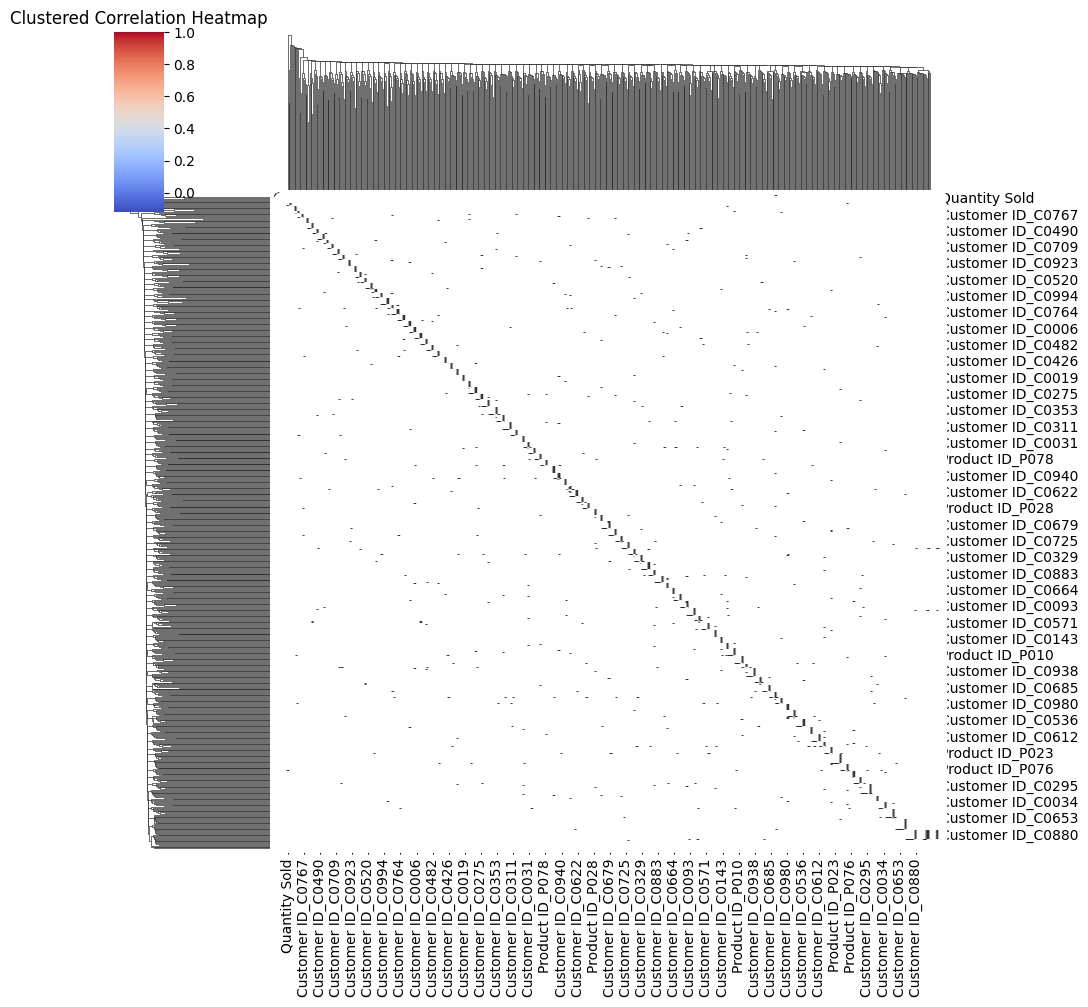

In [7]:
import fastcluster
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Clustered Correlation Heatmap')
plt.show()

In [8]:
# Hypothesis testing (example: comparing mean transaction amounts between different stores)
from scipy.stats import ttest_ind

store_groups = df.groupby('Store ID')['Total Transaction Amount']
p_values = {}
for store1 in store_ids:
    for store2 in store_ids:
        if store1 != store2:
            p_value = ttest_ind(store_groups.get_group(store1), store_groups.get_group(store2)).pvalue
            p_values[f'{store1} vs {store2}'] = p_value

print("P-values for hypothesis testing:")
for comparison, p_value in p_values.items():
    print(f"{comparison}: {p_value}")


P-values for hypothesis testing:
S009 vs S003: 0.8921175472843308
S009 vs S004: 0.6054286151645853
S009 vs S007: 0.34248043000209694
S009 vs S001: 0.8163396514977821
S009 vs S006: 0.7766800424400462
S009 vs S010: 0.40327020188605844
S009 vs S008: 0.5438201392895889
S009 vs S002: 0.8379043975315779
S009 vs S005: 0.8998656047895071
S003 vs S009: 0.8921175472843308
S003 vs S004: 0.5146634091354285
S003 vs S007: 0.2854338552885631
S003 vs S001: 0.7117179355820027
S003 vs S006: 0.6687214795028025
S003 vs S010: 0.3332941687818535
S003 vs S008: 0.6450688651434939
S003 vs S002: 0.9542365729255873
S003 vs S005: 0.9912594895297568
S004 vs S009: 0.6054286151645853
S004 vs S003: 0.5146634091354285
S004 vs S007: 0.6247315450894999
S004 vs S001: 0.7700982096963731
S004 vs S006: 0.7892418476278998
S004 vs S010: 0.74043424461398
S004 vs S008: 0.24600605710859022
S004 vs S002: 0.44498165938512
S004 vs S005: 0.5186722797453719
S007 vs S009: 0.34248043000209694
S007 vs S003: 0.2854338552885631
S007 vs S0

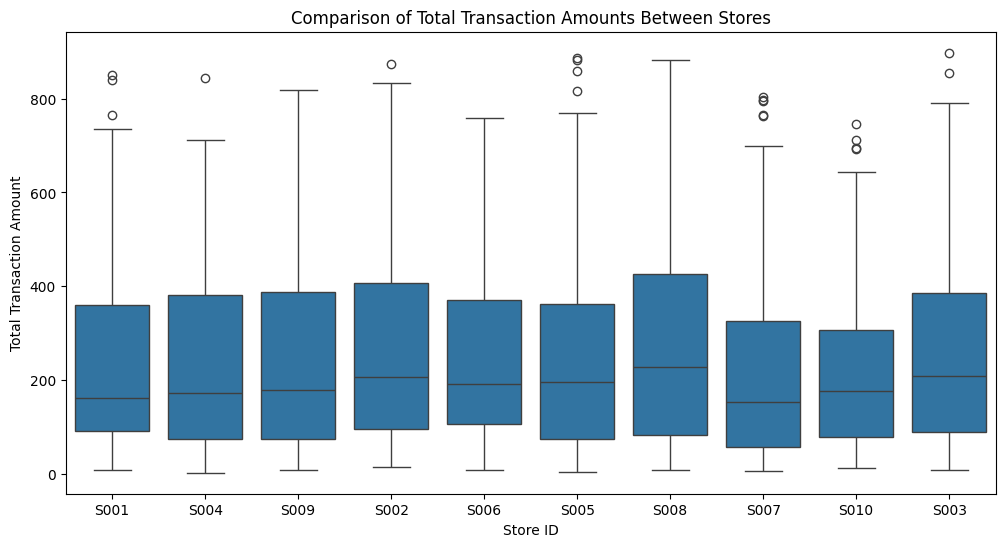

In [9]:
# Box plot for comparing total transaction amounts between stores
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store ID', y='Total Transaction Amount', data=df)
plt.title('Comparison of Total Transaction Amounts Between Stores')
plt.xlabel('Store ID')
plt.ylabel('Total Transaction Amount')
plt.show()


In [3]:
monthly_sales = df.resample('M', on='Date & Time')['Total Transaction Amount'].sum()
print(monthly_sales)


Date & Time
2024-01-31    24288.845707
2024-02-29    19649.631237
2024-03-31    20519.036359
2024-04-30    21867.576639
2024-05-31    23037.295300
2024-06-30    19657.349907
2024-07-31    22493.037946
2024-08-31    15154.346456
2024-09-30    18303.436580
2024-10-31    18091.335237
2024-11-30    18991.559737
2024-12-31    22513.719013
Freq: M, Name: Total Transaction Amount, dtype: float64


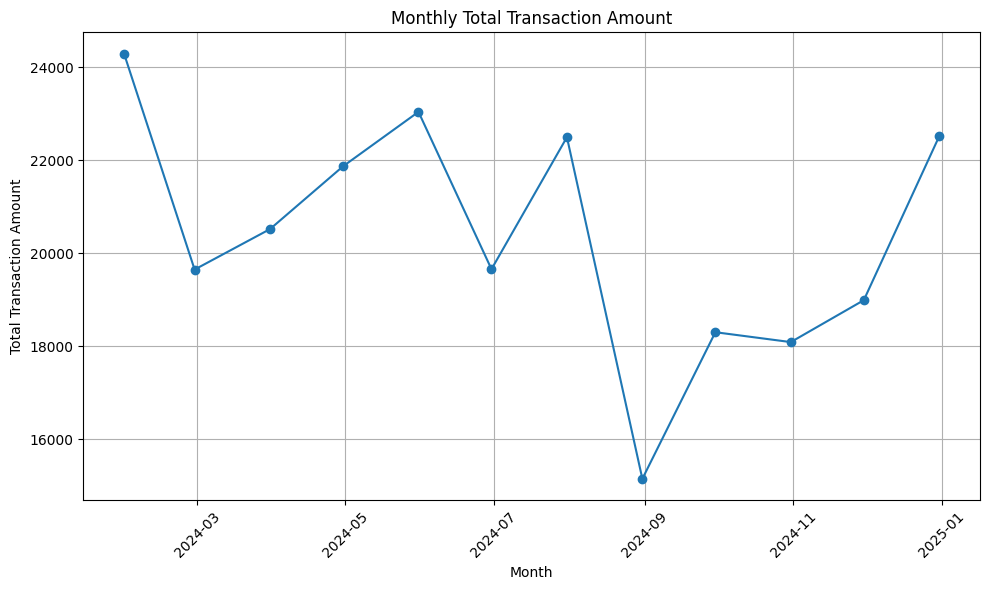

In [4]:
import matplotlib.pyplot as plt

# Plotting the time series data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Total Transaction Amount')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
